# Interest Rate Modelling and calibration- Himanshu Bhardwaj

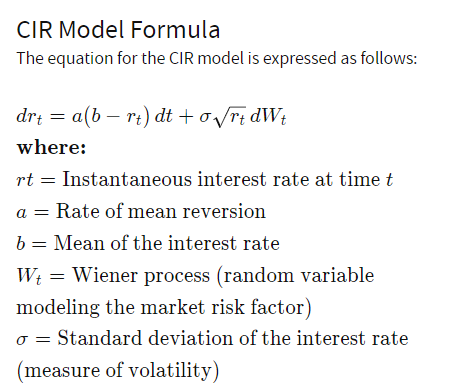 

Where:

rt = the instantaneous interest rate at time t

a = rate of mean reversion

b = mean of the interest rate

Wt = Wiener process (random variable modeling the market risk factor)

 sigma = the standard deviation of the interest rate (a meas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()

In [13]:
rates = pd.read_csv('file1.csv')
rates['Date'] = pd.to_datetime(rates['Date'])
rates = rates.sort_values('Date', ascending=True)
rates.head()

,Date,Price,Open,High,Low,Change %
4999,2000-04-28,10.342,10.342,10.342,10.342,-0.02%
4998,2000-04-29,10.364,10.364,10.364,10.364,0.21%
4997,2000-05-02,10.410,10.410,10.410,10.410,0.44%
4996,2000-05-03,10.436,10.436,10.436,10.436,0.25%
4995,2000-05-04,10.494,10.494,10.494,10.494,0.56%


In [14]:
rates['interest'] = rates['Price']/100
rates = rates.set_index('Date')

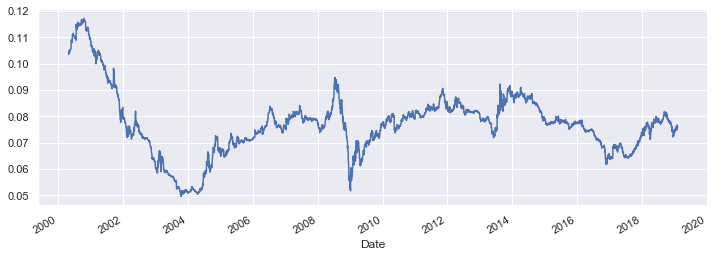

In [15]:
rates['interest'].plot(figsize=(12,4))

In [16]:
rates['interest'].std()

0.012458095901860167

In [17]:
rates.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2000-04-28 to 2019-02-06
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     5000 non-null   float64
 1   Open      5000 non-null   float64
 2   High      5000 non-null   float64
 3   Low       5000 non-null   float64
 4   Change %  5000 non-null   object 
 5   interest  5000 non-null   float64
dtypes: float64(5), object(1)
memory usage: 273.4+ KB


In [18]:
rates.isna().sum()

Price       0
Open        0
High        0
Low         0
Change %    0
interest    0
dtype: int64

In [20]:
rates.head()

,Price,Open,High,Low,Change %,interest
Date,,,,,,
2000-04-28,10.342,10.342,10.342,10.342,-0.02%,0.10342
2000-04-29,10.364,10.364,10.364,10.364,0.21%,0.10364
2000-05-02,10.410,10.410,10.410,10.410,0.44%,0.10410
2000-05-03,10.436,10.436,10.436,10.436,0.25%,0.10436
2000-05-04,10.494,10.494,10.494,10.494,0.56%,0.10494


**Cox ingersoll Ross Model**

In [203]:
def vesicek(r0, K, Theta, sigma, T, N, seed=888):
    np.random.seed(seed)
    dt = T/float(N)
    r=[r0]
    for i in range(N):
        dr = K*(Theta-r[-1])*dt + sigma*np.random.normal()
        r.append(r[-1]+dr)
    return r

In [19]:
import math
def CIR(r0, K, Theta, sigma, T, N, seed=888):
    np.random.seed(seed)
    dt = T/float(N)
    r = [r0]
    for i in range(N):
        dr = K*(Theta-r[-1])*dt + sigma*np.sqrt(r[-1])*np.random.normal()
        r.append(r[-1]+dr)
    return r
    

In [268]:
yy = [CIR(0.10342, 1, 0.10, 0.012458, 9, 4999, 888)]
yy = np.array(yy)
it_CIR = pd.DataFrame(yy.T, columns=['cal_int'])

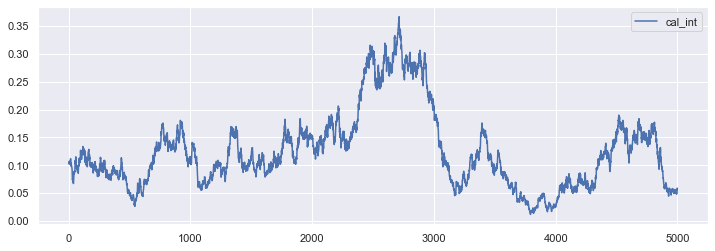

In [269]:
it_CIR.plot(figsize=(12,4))

In [28]:
it_CIR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cal_int  5000 non-null   float64
dtypes: float64(1)
memory usage: 39.2 KB


In [59]:
import scipy.optimize as sco

In [246]:
bnds = [(0.01, 1000),(0.01, 5)]

In [247]:
xguess = [0.1, 0.10]

In [248]:
def objective(par):
    K = par[0]
    Theta = par[1]
    

In [249]:
objective([1,0.12, 0.012])

0.4736622060882635

In [250]:
otp_val = sco.minimize(objective, xguess, bounds=bnds)

In [251]:
otp_val

      fun: 0.021195976620947816
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-6.36296066e-06,  2.61249356e-07,  1.34150423e+00])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 100
      nit: 23
     njev: 25
   status: 0
  success: True
        x: array([1.00000000e+03, 7.64703868e-02, 1.00000000e-02])

In [270]:
yy1 = [CIR(0.10342, 100, 0.01, 0.012458, 1, 4999, 888)]
yy1 = np.array(yy)
it_CIR1 = pd.DataFrame(yy.T, columns=['cal_int'])

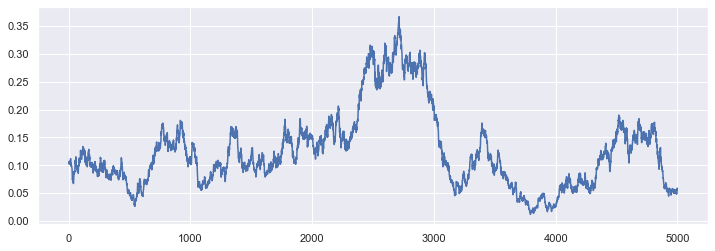

In [271]:
it_CIR1['cal_int'].plot(figsize=(12,4))

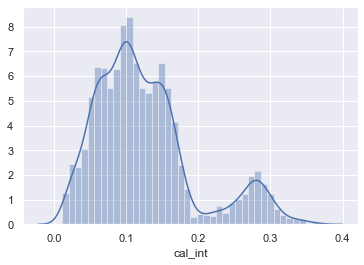

In [272]:
sns.distplot(it_CIR1['cal_int'])

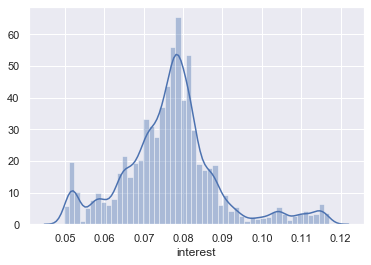

In [144]:
sns.distplot(rates['interest'])

In [273]:
rates['cal_int'] = np.array(it_CIR1['cal_int'])

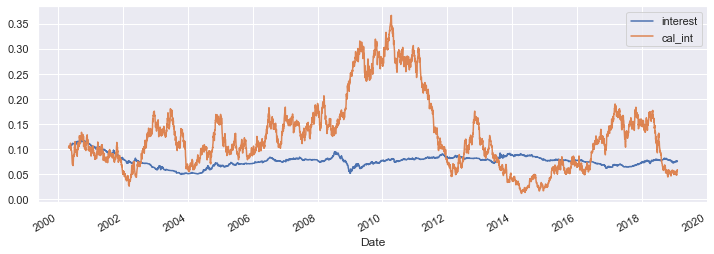

In [274]:
rates[['interest','cal_int']].plot(figsize=(12,4))

In [286]:
new_file = pd.read_csv('file2.csv')

In [276]:
new_file.head()

,Date,Price,Open,High,Low,Change %
0,"May 28, 2021",6.003,5.997,6.003,5.979,0.27%
1,"May 27, 2021",5.987,6.000,6.000,5.978,0.25%
2,"May 25, 2021",5.972,5.989,5.989,5.972,0.00%
3,"May 24, 2021",5.972,5.985,5.985,5.971,-0.08%
4,"May 21, 2021",5.977,5.967,5.978,5.958,0.15%


In [277]:
new_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      265 non-null    object 
 1   Price     265 non-null    float64
 2   Open      265 non-null    float64
 3   High      265 non-null    float64
 4   Low       265 non-null    float64
 5   Change %  265 non-null    object 
dtypes: float64(4), object(2)
memory usage: 12.5+ KB


In [287]:
new_file['Date'] = pd.to_datetime(new_file['Date'])
new_file = new_file.sort_values('Date', ascending=True)

In [288]:
new_file = new_file.set_index(new_file['Date'])

In [292]:
IT_Rate = new_file[['Price']]/100

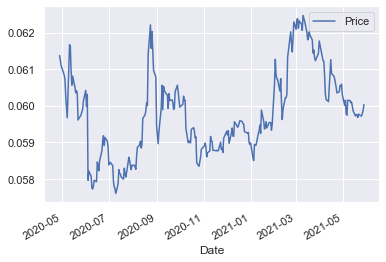

In [293]:
IT_Rate.plot()

In [294]:
IT_Rate.std()

Price    0.001154
dtype: float64

In [295]:
IT_Rate

,Price
Date,
2020-04-28,0.06137
2020-04-29,0.06125
2020-04-30,0.06110
2020-05-04,0.06084
2020-05-05,0.06073
...,...
2021-05-21,0.05977
2021-05-24,0.05972
2021-05-25,0.05972


In [383]:
def obj(par):
    K = par[0]
    Theta = par[1]
    diff = np.array(IT_Rate['Price']-CIR(0.06137, K, Theta, 0.001154, 1, 264, 888))
    val = np.sqrt(np.sum(diff**2)/len(diff))
    return val

In [384]:
bnd1 = [(0.01, 1000), (0.01, 5)]
x0 = [1, 0.1]

In [385]:
otp_val = sco.minimize(obj, x0, bounds=bnd1)

In [386]:
otp_val

      fun: 0.001853119112655693
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-5.04994698e-05,  4.19764050e-06])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 21
      nit: 4
     njev: 7
   status: 0
  success: True
        x: array([0.99493857, 0.05775308])

In [388]:
yy1 = [CIR(0.06137, otp_val.x[0], otp_val.x[1], 0.001154, 1, 264, 888)]
yy1 = np.array(yy1)
it_CIR1 = pd.DataFrame(yy1.T, columns=['cal_int'])

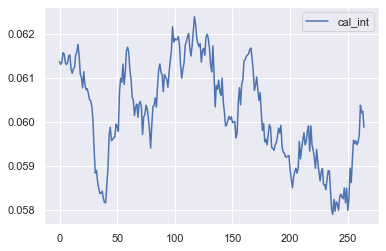

In [389]:
it_CIR1.plot()

In [390]:
IT_Rate['cal_int'] = np.array(it_CIR1['cal_int'])

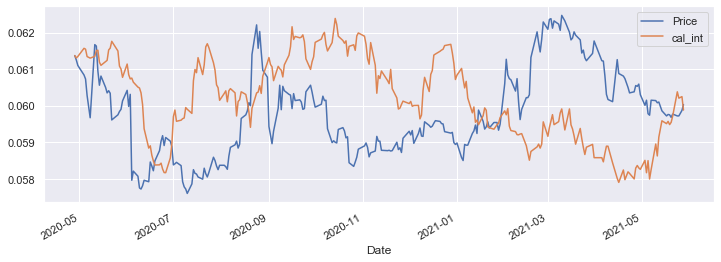

In [391]:
IT_Rate[['Price','cal_int']].plot(figsize=(12,4))

In [392]:
dt = IT_Rate[['Price','cal_int']]

In [393]:
dt

,Price,cal_int
Date,,
2020-04-28,0.06137,0.061370
2020-04-29,0.06125,0.061306
2020-04-30,0.06110,0.061347
2020-05-04,0.06084,0.061569
2020-05-05,0.06073,0.061546
...,...,...
2021-05-21,0.05977,0.059719
2021-05-24,0.05972,0.060379
2021-05-25,0.05972,0.060206


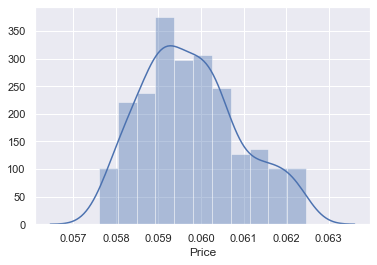

In [394]:
sns.distplot(dt['Price'], kde=True)

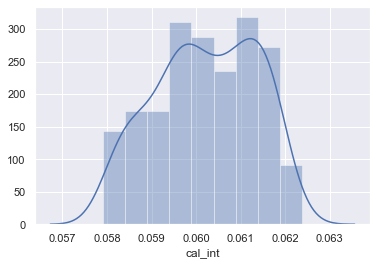

In [395]:
sns.distplot(dt['cal_int'])